In [76]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import random
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [77]:
#importing the train dataset
data1=pd.read_csv("Train_Beneficiarydata.csv",encoding='UTF-8')
data2=pd.read_csv("Train_Inpatientdata.csv",encoding='UTF-8')
data3=pd.read_csv("Train_Outpatientdata.csv",encoding='UTF-8')
data4=pd.read_csv("Train.csv",encoding='UTF-8')

#importing the test dataset
data5=pd.read_csv("Test_Beneficiarydata.csv",encoding='UTF-8')
data6=pd.read_csv("Test_Inpatientdata.csv",encoding='UTF-8')
data7=pd.read_csv("Test_Outpatientdata.csv",encoding='UTF-8')
data8=pd.read_csv("Test.csv",encoding='UTF-8')

In [78]:
#duplicates in datasets

print("duplicates: ",data1.duplicated().sum())
print("duplicates: ",data2.duplicated().sum())
print("duplicates: ",data3.duplicated().sum())
print("duplicates: ",data4.duplicated().sum())

print("duplicates: ",data5.duplicated().sum())
print("duplicates: ",data6.duplicated().sum())
print("duplicates: ",data7.duplicated().sum())
print("duplicates: ",data8.duplicated().sum())

duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0


In [79]:
#shape of train
print("data1: ",data1.shape)
print("data2: ",data2.shape)
print("data3: ",data3.shape)
print("data4: ",data4.shape)

#shape of test
print("data5: ",data5.shape)
print("data6: ",data6.shape)
print("data7: ",data7.shape)
print("data8: ",data8.shape)

data1:  (138556, 25)
data2:  (40474, 30)
data3:  (517737, 27)
data4:  (5410, 2)
data5:  (63968, 25)
data6:  (9551, 30)
data7:  (125841, 27)
data8:  (1353, 1)


In [80]:
data1.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [81]:
data2.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [82]:
data3.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [83]:
data4.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [84]:
data5.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [85]:
data6.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
data7.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [87]:
data8.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [88]:
data1.info()
data2.info()
data3.info()
data4.info()

data5.info()
data6.info()
data7.info()
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [89]:
print(data1.isnull().sum())
print("******************************************")
print(data2.isnull().sum())
print("******************************************")
print(data3.isnull().sum())
print("******************************************")
print(data4.isnull().sum())
print("******************************************")
print("******************************************")
print(data5.isnull().sum())
print("******************************************")
print(data6.isnull().sum())
print("******************************************")
print(data7.isnull().sum())
print("******************************************")
print(data8.isnull().sum())

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [90]:
#replacing dates with age
data1['DOB']=pd.to_datetime(data1['DOB'],format = '%Y-%m-%d')
data1['DOD']=pd.to_datetime(data1['DOD'],format = '%Y-%m-%d',errors='ignore')
data1['Age']=round(((data1['DOD']-data1['DOB']).dt.days)/365)

data5['DOB']=pd.to_datetime(data5['DOB'],format = '%Y-%m-%d')
data5['DOD']=pd.to_datetime(data5['DOD'],format = '%Y-%m-%d',errors='ignore')
data5['Age']=round(((data5['DOD']-data5['DOB']).dt.days)/365)

data1.Age.fillna(round(((pd.to_datetime('2009-12-01',format='%Y-%m-%d')-data1['DOB']).dt.days)/365),inplace=True)
data5.Age.fillna(round(((pd.to_datetime('2009-12-01',format='%Y-%m-%d')-data5['DOB']).dt.days)/365),inplace=True)

In [91]:
data3_columns=data3.columns.tolist()
print(data3_columns)

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode']


In [92]:
data2=data2[data3_columns]
data6=data6[data3_columns]

In [93]:
#concating dataset outpatient and inpatient
data2=pd.concat([data2,data3])
data6=pd.concat([data6,data7])

In [94]:
#replacing the dates with "Claim Days"
data2['ClaimStartDt']=pd.to_datetime(data2['ClaimStartDt'],format = '%Y-%m-%d')
data2['ClaimEndDt']=pd.to_datetime(data2['ClaimEndDt'],format = '%Y-%m-%d')
data2['ClaimDays']=((data2['ClaimEndDt'] - data2['ClaimStartDt']).dt.days)+1

data6['ClaimStartDt']=pd.to_datetime(data6['ClaimStartDt'],format = '%Y-%m-%d')
data6['ClaimEndDt']=pd.to_datetime(data6['ClaimEndDt'],format = '%Y-%m-%d')
data6['ClaimDays']=((data6['ClaimEndDt'] - data6['ClaimStartDt']).dt.days)+1

#train data
data1.drop('DOD',axis=1,inplace=True)
data1.drop('DOB',axis=1,inplace=True)

data2.drop('ClaimStartDt',axis=1,inplace=True)
data2.drop('ClaimEndDt',axis=1,inplace=True)

#test data
data5.drop('DOD',axis=1,inplace=True)
data5.drop('DOB',axis=1,inplace=True)

data6.drop('ClaimStartDt',axis=1,inplace=True)
data6.drop('ClaimEndDt',axis=1,inplace=True)

In [95]:
print("**************TRAIN DATA 1 ****************")
print((data1.isna().sum()/len(data1))*100)
print("**************TEST DATA 5 ****************")
print((data5.isna().sum()/len(data1))*100)

**************TRAIN DATA 1 ****************
BeneID                             0.0
Gender                             0.0
Race                               0.0
RenalDiseaseIndicator              0.0
State                              0.0
County                             0.0
NoOfMonths_PartACov                0.0
NoOfMonths_PartBCov                0.0
ChronicCond_Alzheimer              0.0
ChronicCond_Heartfailure           0.0
ChronicCond_KidneyDisease          0.0
ChronicCond_Cancer                 0.0
ChronicCond_ObstrPulmonary         0.0
ChronicCond_Depression             0.0
ChronicCond_Diabetes               0.0
ChronicCond_IschemicHeart          0.0
ChronicCond_Osteoporasis           0.0
ChronicCond_rheumatoidarthritis    0.0
ChronicCond_stroke                 0.0
IPAnnualReimbursementAmt           0.0
IPAnnualDeductibleAmt              0.0
OPAnnualReimbursementAmt           0.0
OPAnnualDeductibleAmt              0.0
Age                                0.0
dtype: float64
*****

In [96]:
print("**************TRAIN DATA 2 ****************")
print((data2.isna().sum()/len(data2))*100)
print("**************TEST DATA 6 ****************")
print((data6.isna().sum()/len(data6))*100)

**************TRAIN DATA 2 ****************
BeneID                      0.000000
ClaimID                     0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.270149
OperatingPhysician         79.497538
OtherPhysician             64.218548
ClmDiagnosisCode_1          1.872589
ClmDiagnosisCode_2         35.041588
ClmDiagnosisCode_3         56.458221
ClmDiagnosisCode_4         70.524407
ClmDiagnosisCode_5         79.949517
ClmDiagnosisCode_6         84.881702
ClmDiagnosisCode_7         88.144805
ClmDiagnosisCode_8         90.425843
ClmDiagnosisCode_9         92.509105
ClmDiagnosisCode_10        99.102490
ClmProcedureCode_1         95.824160
ClmProcedureCode_2         99.016501
ClmProcedureCode_3         99.826410
ClmProcedureCode_4         99.978861
ClmProcedureCode_5         99.998388
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.161050
ClmAdmitDiagnosisCode      73.863109
ClaimDays                   0.0

In [97]:
x1=(data2.isna().sum()/len(data2))*100
col_Todrop_data2=x1[x1> 80].index.tolist()

In [98]:
for i in col_Todrop_data2:
    data2.drop(i,axis=1,inplace=True)
    data6.drop(i,axis=1,inplace=True)

In [99]:
#merging the datset on beneficiary ID
merged_data_1=pd.merge(data2, data1, on='BeneID', how='left')
test_merged_data_1=pd.merge(data6, data5, on='BeneID', how='left')

In [100]:
merged_data_1.isna().sum()

BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
ClaimDays                               0
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure          

In [101]:
print("the inpatient and outpatient shape: ",merged_data_1.shape)
print("the test inpatient and outpatient shape: ",test_merged_data_1.shape)

the inpatient and outpatient shape:  (558211, 38)
the test inpatient and outpatient shape:  (135392, 38)


In [102]:
#merging the dataset on Provider
Final_data=pd.merge(merged_data_1, data4, on='Provider', how='right')
Final_data_test=pd.merge(test_merged_data_1, data8, on='Provider', how='right')

In [103]:
Final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   Provider                         558211 non-null  object 
 3   InscClaimAmtReimbursed           558211 non-null  int64  
 4   AttendingPhysician               556703 non-null  object 
 5   OperatingPhysician               114447 non-null  object 
 6   OtherPhysician                   199736 non-null  object 
 7   ClmDiagnosisCode_1               547758 non-null  object 
 8   ClmDiagnosisCode_2               362605 non-null  object 
 9   ClmDiagnosisCode_3               243055 non-null  object 
 10  ClmDiagnosisCode_4               164536 non-null  object 
 11  ClmDiagnosisCode_5               111924 non-null  object 
 12  De

In [104]:
d=Final_data.loc[:, Final_data.isna().sum()>0]
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AttendingPhysician     556703 non-null  object 
 1   OperatingPhysician     114447 non-null  object 
 2   OtherPhysician         199736 non-null  object 
 3   ClmDiagnosisCode_1     547758 non-null  object 
 4   ClmDiagnosisCode_2     362605 non-null  object 
 5   ClmDiagnosisCode_3     243055 non-null  object 
 6   ClmDiagnosisCode_4     164536 non-null  object 
 7   ClmDiagnosisCode_5     111924 non-null  object 
 8   DeductibleAmtPaid      557312 non-null  float64
 9   ClmAdmitDiagnosisCode  145899 non-null  object 
dtypes: float64(1), object(9)
memory usage: 42.6+ MB
None


In [105]:
arrC=['AttendingPhysician','OperatingPhysician','OtherPhysician','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4'
                           ,'ClmDiagnosisCode_5','ClmAdmitDiagnosisCode']
arrN=['DeductibleAmtPaid']  #arrC: all catergorical values arrN: all numerical values
Final_data = Final_data.reset_index(drop=True)
knn_imputer=KNNImputer(n_neighbors=5)

chunk_size=1000  #will impute 1000 at a time since dataset is large it takes time

for i in range(0,len(Final_data),chunk_size):
    chunk_data=Final_data.iloc[i:i+chunk_size]
    imputed_chunk=knn_imputer.fit_transform(chunk_data[arrN])
    Final_data.loc[i:i+chunk_size-1,arrN]=imputed_chunk

for i in arrC:
    categories=Final_data[i].dropna().unique()
    Final_data[i].fillna(random.choice(categories), inplace=True)

In [106]:
Final_data.to_csv('Final_data.csv', index=False)

In [107]:
print("the final shape: ",Final_data.shape)
print("final test shape: ",Final_data_test.shape)
Final_data.isna().sum()

the final shape:  (558211, 39)
final test shape:  (135392, 38)


BeneID                             0
ClaimID                            0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
DeductibleAmtPaid                  0
ClmAdmitDiagnosisCode              0
ClaimDays                          0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
C

In [108]:
Final_data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE36012,CLM58316,PRV51001,36000,PHY340163,PHY344220,PHY380816,29650,2971,3051,...,1,2,2,1,36000,1068,3520,140,69.0,No
1,BENE38773,CLM52334,PRV51001,12000,PHY346762,PHY344220,PHY380816,0388,5849,2841,...,2,2,2,2,95000,2136,2270,900,72.0,No
2,BENE98831,CLM36844,PRV51001,3000,PHY383193,PHY344220,PHY380816,56211,5533,0088,...,1,2,1,2,3000,1068,0,0,75.0,No
3,BENE102690,CLM49733,PRV51001,42000,PHY383193,PHY378091,PHY389113,4241,42731,4168,...,1,2,1,2,143800,4272,880,70,80.0,No
4,BENE152088,CLM37205,PRV51001,4000,PHY402229,PHY329739,PHY380816,85222,2724,3310,...,1,2,1,1,111710,4272,80,70,96.0,No


In [109]:
Final_data.nunique()

BeneID                             138556
ClaimID                            558211
Provider                             5410
InscClaimAmtReimbursed                438
AttendingPhysician                  82063
OperatingPhysician                  35315
OtherPhysician                      46457
ClmDiagnosisCode_1                  10450
ClmDiagnosisCode_2                   5300
ClmDiagnosisCode_3                   4756
ClmDiagnosisCode_4                   4359
ClmDiagnosisCode_5                   3970
DeductibleAmtPaid                     334
ClmAdmitDiagnosisCode                4098
ClaimDays                              37
Gender                                  2
Race                                    4
RenalDiseaseIndicator                   2
State                                  52
County                                314
NoOfMonths_PartACov                    13
NoOfMonths_PartBCov                    13
ChronicCond_Alzheimer                   2
ChronicCond_Heartfailure          

In [110]:
#Encoding the dataset
from sklearn.preprocessing import LabelEncoder

#encoding using LabelEncoder
encoders_temp = {}
arrCatergorical=Final_data.select_dtypes(include='object').columns.tolist()
arrCatergorical.remove("PotentialFraud")
for col in arrCatergorical:
    le = LabelEncoder()

    combined_values = Final_data[col].tolist() + Final_data_test[col].tolist() + ['unknown']
    le.fit(combined_values)
    
    Final_data[col] = le.transform(Final_data[col])
    Final_data_test[col] = le.transform(Final_data_test[col])

    encoders_temp[col] = le  

#joblib.dump(encoders, 'label_encoders.pkl')

Final_data['PotentialFraud']=Final_data['PotentialFraud'].map({'Yes':1,'No':0})


In [111]:
Final_data_test.shape

(135392, 38)

In [112]:
Final_data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,84141,500464,0,36000,23870,11855,32680,2252,1045,999,...,1,2,2,1,36000,1068,3520,140,69.0,0
1,86900,434662,0,12000,29272,11855,32680,203,2691,760,...,2,2,2,2,95000,2136,2270,900,72.0,0
2,146903,264272,0,3000,58985,11855,32680,5037,2524,5,...,1,2,1,2,3000,1068,0,0,75.0,0
3,2690,406051,0,42000,58985,23904,36581,4079,1999,1700,...,1,2,1,2,143800,4272,880,70,80.0,0
4,56255,268243,0,4000,74562,6744,32680,8434,777,1109,...,1,2,1,1,111710,4272,80,70,96.0,0


In [113]:
Final_data_test.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,35735,19890,1,100,87736,38031,48198,4559,3954,4704,...,1,2,2,2,2,0,0,1310,590,75.0
1,42031,53925,1,40,72347,39025,57492,7304,5206,920,...,1,1,2,2,2,22000,3204,1020,910,89.0
2,42031,242554,1,70,33807,43653,57492,10167,5123,5017,...,1,1,2,2,2,22000,3204,1020,910,89.0
3,42031,409985,1,100,45095,43653,57492,4125,5542,5017,...,1,1,2,2,2,22000,3204,1020,910,89.0
4,49287,162809,1,400,74168,43653,9035,839,5542,5017,...,1,1,1,2,1,8000,13136,1520,730,49.0


<Axes: >

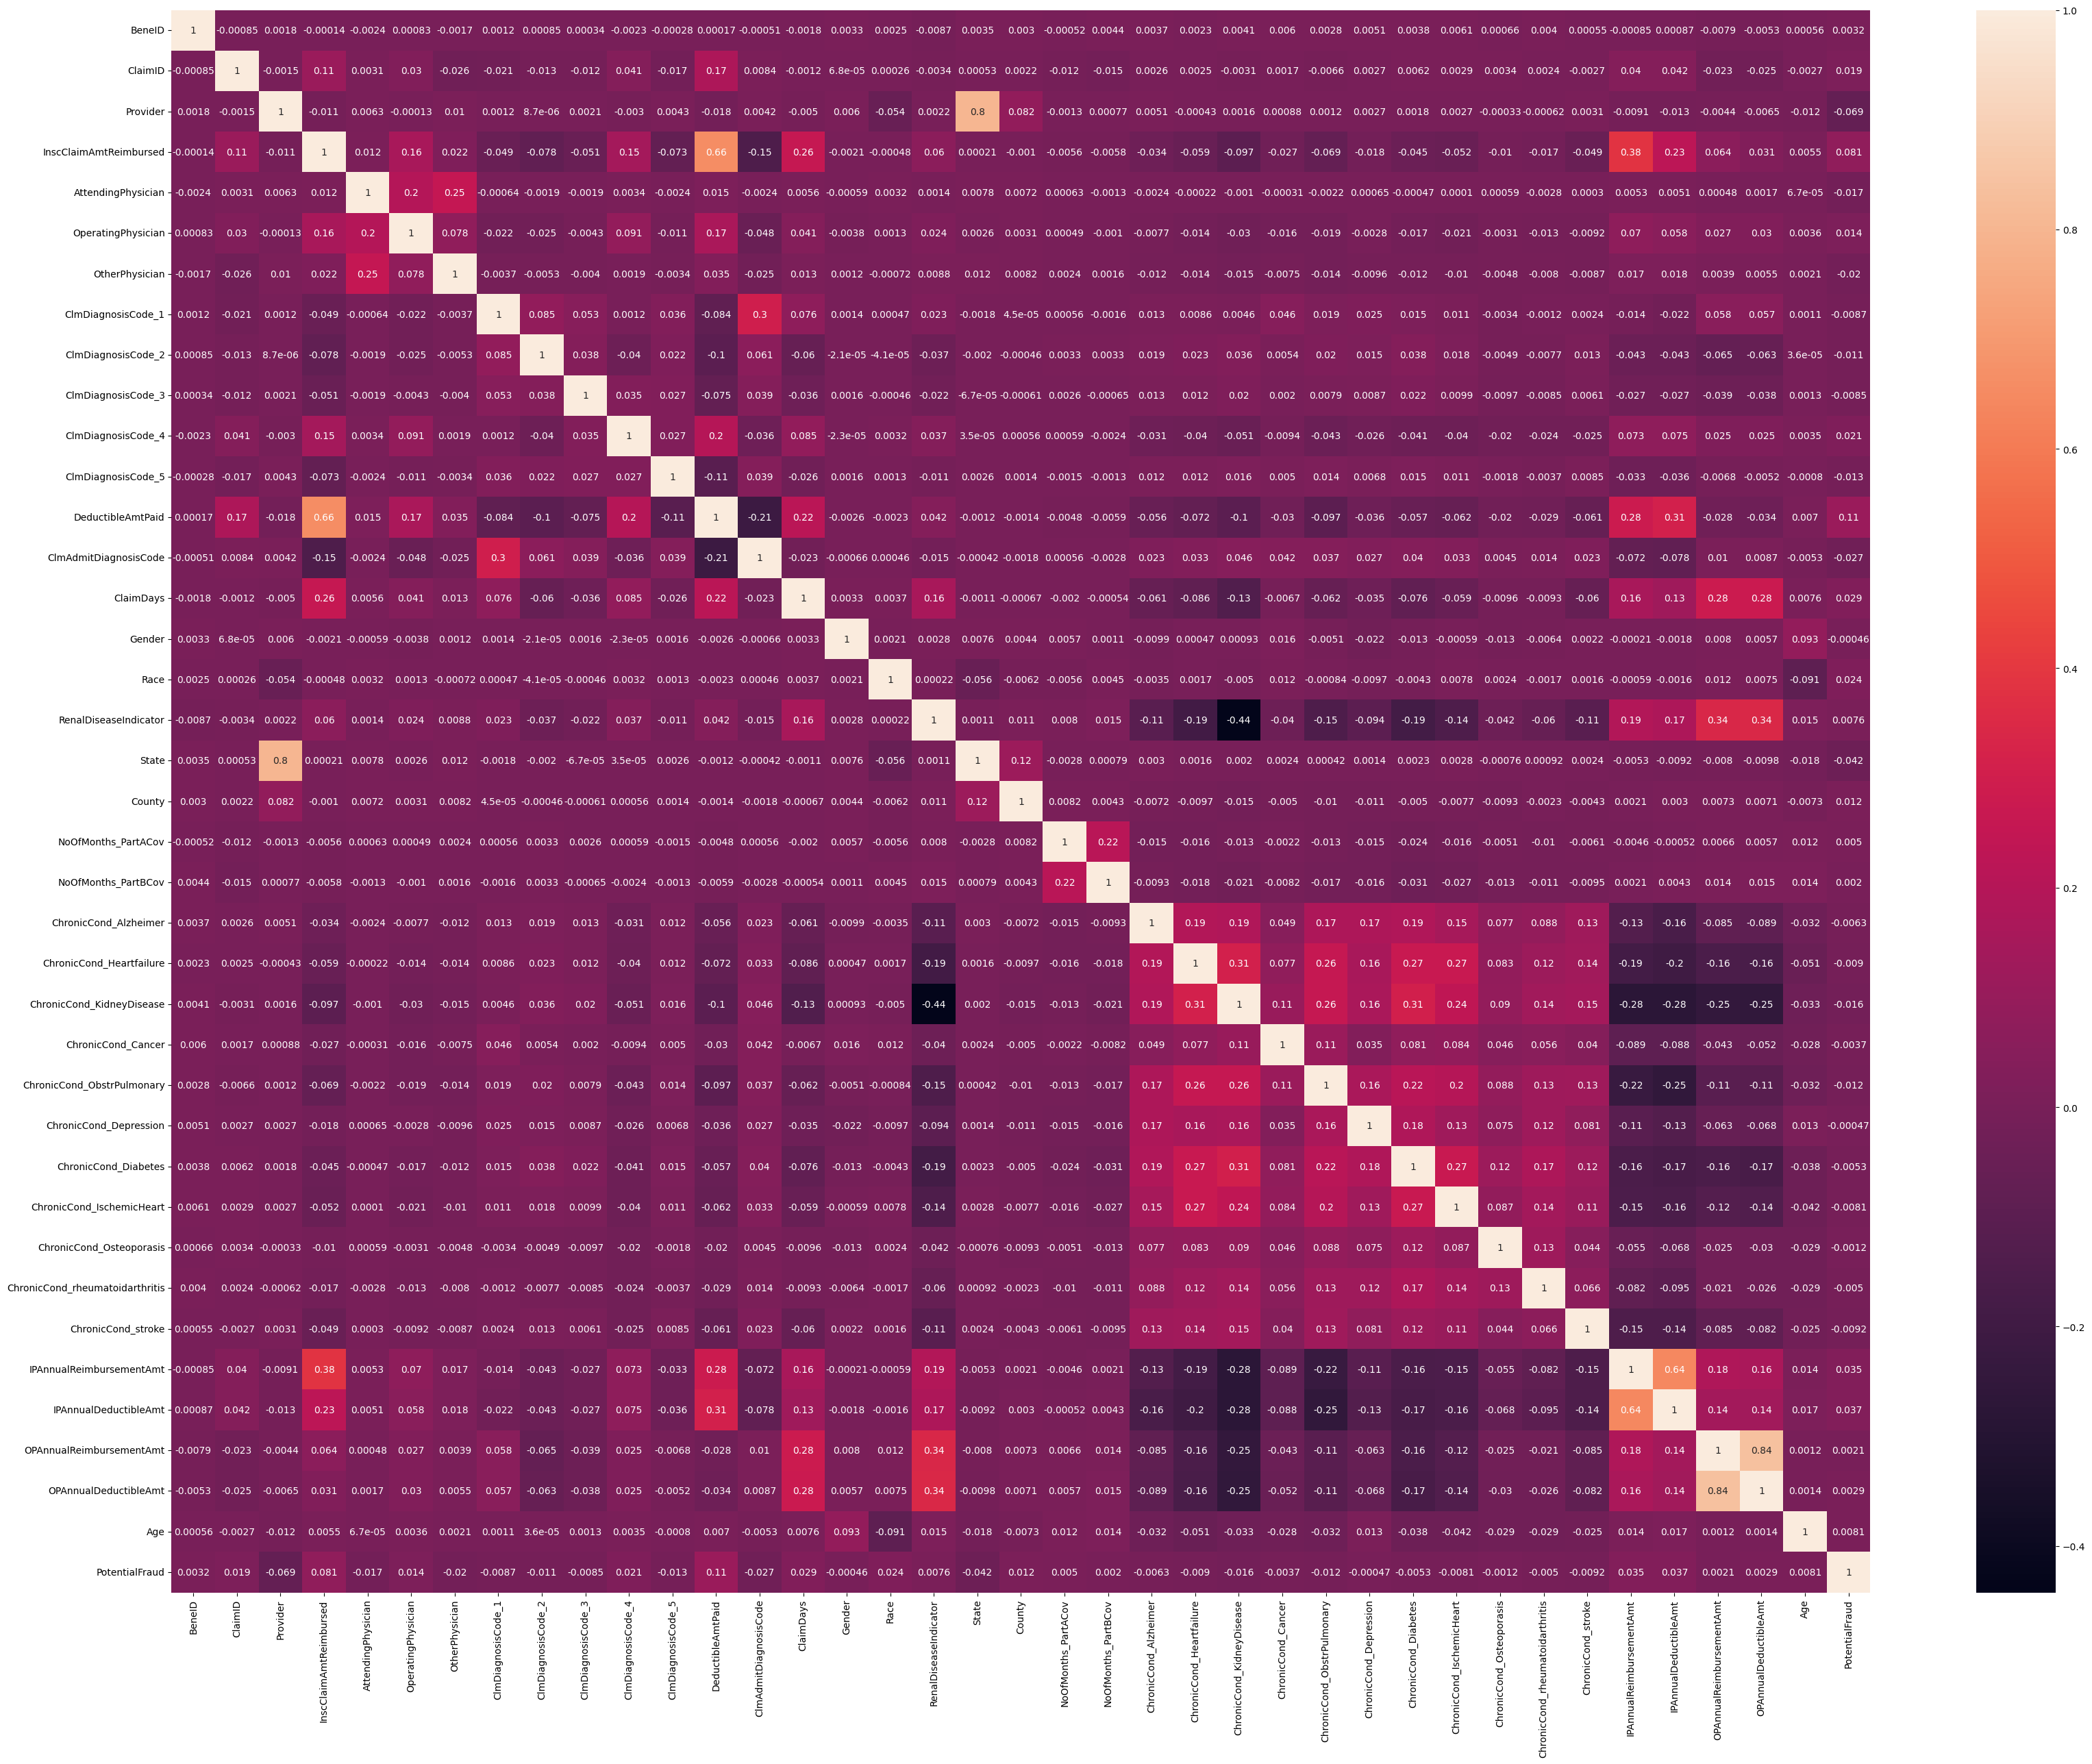

In [114]:
plt.figure(figsize=(40,30))
sns.heatmap(Final_data.corr(),annot=True)

Now we finally have a usable dataset 

In [115]:
 from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [116]:
X1=Final_data.iloc[:,:-1]
y1=Final_data.iloc[:,-1]

In [117]:
X1_resampled,y1_resampled=RandomUnderSampler().fit_resample(X1,y1)

In [118]:
from collections import Counter
print(Counter(y1_resampled))

Counter({0: 212796, 1: 212796})


In [119]:
print(X1_resampled.shape)
print(y1_resampled.shape)

(425592, 38)
(425592,)


In [121]:
print(X1_resampled.shape)
print(y1_resampled.shape)

(425592, 38)
(425592,)


In [122]:
arr1=Final_data.columns.tolist()
arr1.remove('PotentialFraud')
X1_proccessed=pd.DataFrame(X1_resampled,columns=arr1)
y1_proccessed=pd.DataFrame(y1_resampled,columns=['PotentialFraud'])

X1_proccessed=X1_proccessed.reset_index(drop=True)
y1_proccessed=y1_proccessed.reset_index(drop=True)

Final_data_proccessed=pd.concat([X1_proccessed,y1_proccessed],axis=1)
Final_data_proccessed.shape

(425592, 39)

In [123]:
Final_data_proccessed.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,126187,13152,5280,100,77243,11855,32680,2810,2948,2275,...,1,2,1,1,0,0,300,180,60.0,0
1,62692,469397,3155,50,72517,11855,41568,5932,2948,2275,...,2,1,2,2,0,0,2470,1250,78.0,0
2,103292,577282,396,100,9211,11855,5327,4029,2948,2275,...,1,2,1,2,3000,1068,2730,460,81.0,0
3,83876,99316,5150,20,87557,11855,32680,3953,3163,2275,...,2,2,2,2,0,0,240,340,77.0,0
4,36009,448972,669,40,39762,11855,15910,5268,2948,2275,...,2,2,1,2,2720,1068,2870,2030,85.0,0


In [124]:
Final_data_proccessed.isna().sum()

BeneID                             0
ClaimID                            0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
DeductibleAmtPaid                  0
ClmAdmitDiagnosisCode              0
ClaimDays                          0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
C

In [125]:
print("duplicates: ",Final_data_proccessed.duplicated().sum())

duplicates:  0


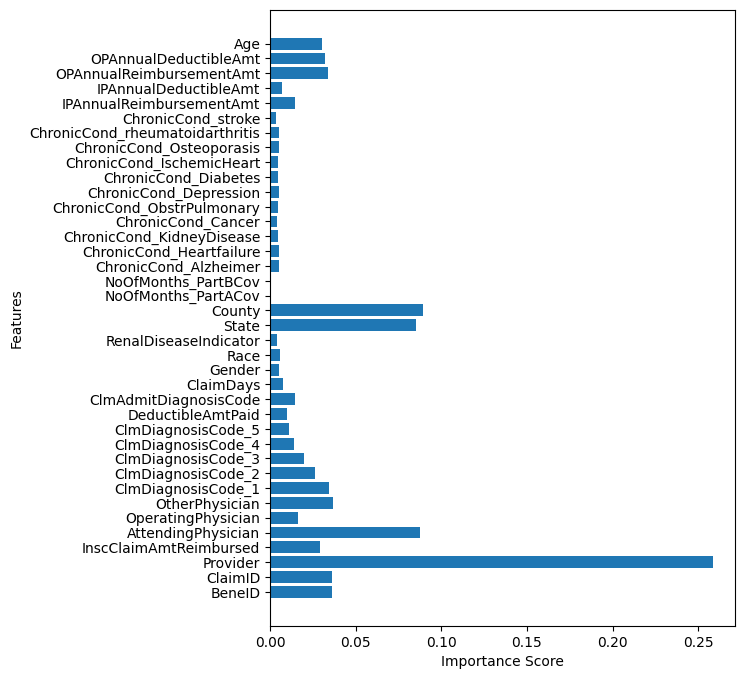

In [126]:
#manual feature selection
X1=Final_data_proccessed.iloc[:,:-1]
y1=Final_data_proccessed.iloc[:,-1]

rf1=RandomForestClassifier(n_estimators=60,random_state=42)
rf1.fit(X1,y1)

plt.figure(figsize=(6,8))
feature_names = list(arr1)
plt.barh(feature_names, rf1.feature_importances_)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [127]:
arr=rf1.feature_importances_.tolist()
arr.sort(reverse=True)
print(arr)

[0.25854931776931217, 0.089344493522608, 0.08754874700536106, 0.08546669893906537, 0.036826030034408354, 0.036447530047633875, 0.036052262420260904, 0.03451219360193994, 0.03407198161825758, 0.0319542028503875, 0.03043168111644934, 0.02920448632176196, 0.026374655784461472, 0.01963579132919436, 0.01622766813145038, 0.014534918823375856, 0.014440540930852147, 0.01405985391091715, 0.011036985090603026, 0.009860323373033074, 0.007612446933668213, 0.007230987284491421, 0.00574280090030292, 0.005507172008104221, 0.00529845819504225, 0.0051843902153972995, 0.005156007911087474, 0.005108464185185878, 0.0051034369478521685, 0.004879545829178935, 0.004816374849084221, 0.00477161863310443, 0.004588107352844826, 0.004003400942647586, 0.0038811996972207582, 0.003242589311282377, 0.0007460603552890747, 0.0005465758268824421]


In [128]:
threshold=0.02
selected_columns = np.where(rf1.feature_importances_ > threshold)[0]

# Get the names of selected features
selected_features_1=Final_data_proccessed.columns[selected_columns]  

print("Selected features:",selected_features_1)

Selected features: Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'State', 'County', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age'],
      dtype='object')


In [129]:
selected_categorical_encoders = {
    col: encoders_temp[col]
    for col in selected_features_1
    if col in encoders_temp
}

# Save selected encoders and features
joblib.dump(selected_categorical_encoders, 'label_encoders_selected.pkl')
joblib.dump(selected_features_1, 'selected_features.pkl')





['selected_features.pkl']

In [130]:
X1=Final_data_proccessed.loc[:,selected_features_1]
Final_data_test=Final_data_test.loc[:,selected_features_1]
y1=pd.DataFrame(y1,columns=['PotentialFraud'])

New_data=pd.concat([X1,y1],axis=1)

In [131]:
New_data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,State,County,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,126187,13152,5280,100,77243,32680,2810,2948,42,120,300,180,60.0,0
1,62692,469397,3155,50,72517,41568,5932,2948,24,820,2470,1250,78.0,0
2,103292,577282,396,100,9211,5327,4029,2948,5,400,2730,460,81.0,0
3,83876,99316,5150,20,87557,32680,3953,3163,54,100,240,340,77.0,0
4,36009,448972,669,40,39762,15910,5268,2948,5,0,2870,2030,85.0,0


In [132]:
New_data.isna().sum()

BeneID                      0
ClaimID                     0
Provider                    0
InscClaimAmtReimbursed      0
AttendingPhysician          0
OtherPhysician              0
ClmDiagnosisCode_1          0
ClmDiagnosisCode_2          0
State                       0
County                      0
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
Age                         0
PotentialFraud              0
dtype: int64

In [133]:
New_data.shape

(425592, 14)

In [134]:
Final_data_test.shape

(135392, 13)

In [135]:
Final_data_test.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,State,County,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,35735,19890,1,100,87736,48198,4559,3954,1,410,1310,590,75.0
1,42031,53925,1,40,72347,57492,7304,5206,1,100,1020,910,89.0
2,42031,242554,1,70,33807,57492,10167,5123,1,100,1020,910,89.0
3,42031,409985,1,100,45095,57492,4125,5542,1,100,1020,910,89.0
4,49287,162809,1,400,74168,9035,839,5542,1,440,1520,730,49.0


In [136]:
X = New_data.drop(columns=['PotentialFraud'])  
y = New_data['PotentialFraud']   

num_cols=["InscClaimAmtReimbursed","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt","Age"]

X_num = X[num_cols]
X_rest = X.drop(columns=num_cols)
my_scaler = StandardScaler()
X_scaled = my_scaler.fit_transform(X_num)

joblib.dump(my_scaler, 'StandardScaler_selected.pkl')

X_scaled_df = pd.DataFrame(X_scaled, columns=num_cols)

New_Data = pd.concat([X_rest.reset_index(drop=True), 
                    X_scaled_df.reset_index(drop=True)], axis=1)


In [137]:
X_rest.head()

,BeneID,ClaimID,Provider,AttendingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,State,County
0,126187,13152,5280,77243,32680,2810,2948,42,120
1,62692,469397,3155,72517,41568,5932,2948,24,820
2,103292,577282,396,9211,5327,4029,2948,5,400
3,83876,99316,5150,87557,32680,3953,3163,54,100
4,36009,448972,669,39762,15910,5268,2948,5,0


In [138]:
New_Data.head()

,BeneID,ClaimID,Provider,AttendingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,State,County,InscClaimAmtReimbursed,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,126187,13152,5280,77243,32680,2810,2948,42,120,-0.240917,-0.508994,-0.468337,-1.059504
1,62692,469397,3155,72517,41568,5932,2948,24,820,-0.253291,0.049178,0.598630,0.322805
2,103292,577282,396,9211,5327,4029,2948,5,400,-0.240917,0.116055,-0.189131,0.553190
3,83876,99316,5150,87557,32680,3953,3163,54,100,-0.260716,-0.524427,-0.308791,0.246010
4,36009,448972,669,39762,15910,5268,2948,5,0,-0.255766,0.152066,1.376420,0.860370


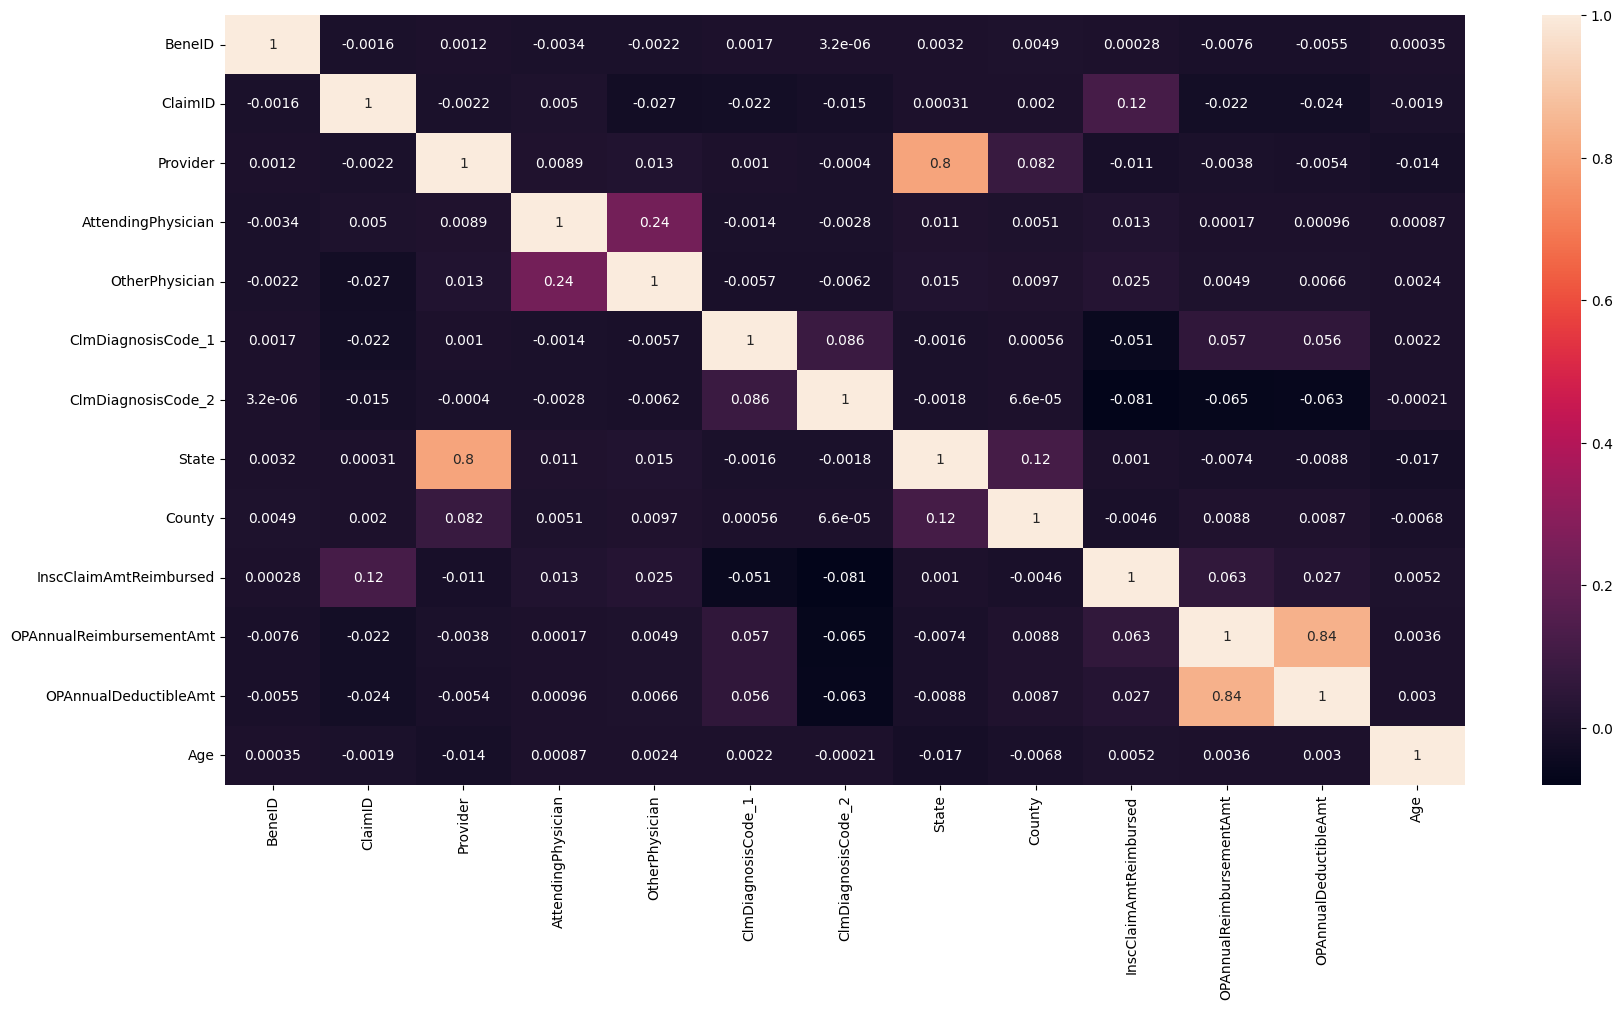

In [139]:
plt.figure(figsize=(20, 10))
sns.heatmap(New_Data.corr(),annot=True)
plt.show()

In [140]:
#splisting the datset into train and test
X2=New_Data.iloc[:,:]
y2=y
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3,random_state=42)

Decision Tree Classifier and it's results

In [141]:
dtc=DecisionTreeClassifier()

scores = cross_val_score(dtc,X_train,y_train,cv=5,scoring='accuracy')
# Printing the scores
print("Accuracy scores:",scores)
print("the Training accuracy:",scores.mean()*100)

dtc.fit(X_train,y_train)
predict2=dtc.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,predict2)*100)
print("the f1 score is : ",f1_score(y_test, predict2)*100)  #f1 Score
print("classification report:\n ",classification_report(y_test,predict2)) #Classification Report

Accuracy scores: [0.98553279 0.9861202  0.98633839 0.98659013 0.98610319]
the Training accuracy: 98.61369387348255
Accuracy:  98.80245617882485
the f1 score is :  98.80308426944303
classification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99     63868
           1       0.99      0.99      0.99     63810

    accuracy                           0.99    127678
   macro avg       0.99      0.99      0.99    127678
weighted avg       0.99      0.99      0.99    127678



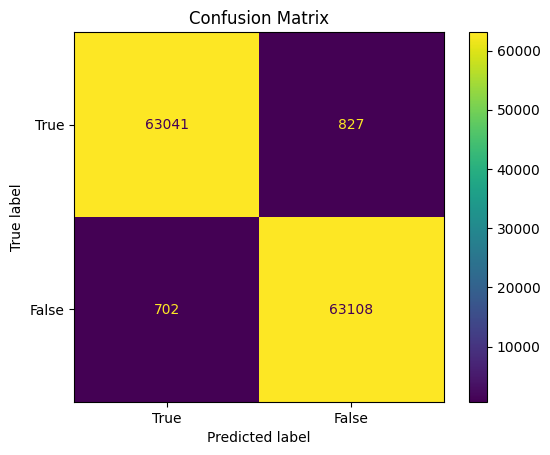

In [142]:
#confusion matrix

cnf_matrix=confusion_matrix(y_test,predict2)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=[True, False]).plot()
plt.title('Confusion Matrix')
plt.show()

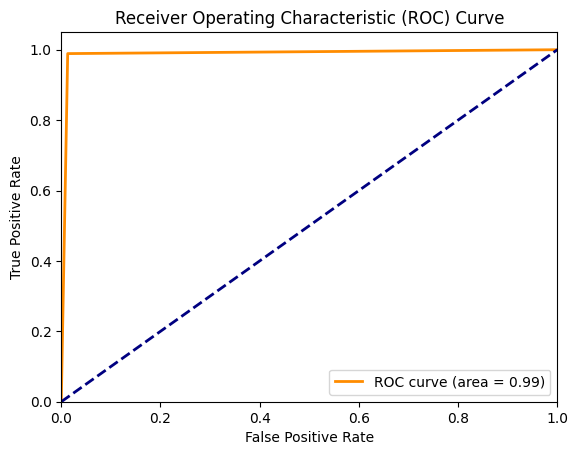

In [143]:
#AUC/ROC curve
y_pred_proba=dtc.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _=roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve (area = %0.2f)'%roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

RandomForest Classifier and it's results

In [144]:

rf2=RandomForestClassifier(n_estimators=60,random_state=42)

scores = cross_val_score(rf2,X_train,y_train,cv=5,scoring='accuracy')
# Printing the scores
print("Accuracy scores:", scores)
print("the Training accuracy:",scores.mean()*100)

rf2.fit(X_train,y_train)
predict2=rf2.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,predict2)*100)
print("the f1 score is : ",f1_score(y_test, predict2)*100)  #f1 Score
print("classification report:\n ",classification_report(y_test,predict2)) #Classification Report

Accuracy scores: [0.91541211 0.91777856 0.91202189 0.91470722 0.91527643]
the Training accuracy: 91.50392403082283
Accuracy:  92.0095866163317
the f1 score is :  91.8386611628428
classification report:
                precision    recall  f1-score   support

           0       0.90      0.94      0.92     63868
           1       0.94      0.90      0.92     63810

    accuracy                           0.92    127678
   macro avg       0.92      0.92      0.92    127678
weighted avg       0.92      0.92      0.92    127678



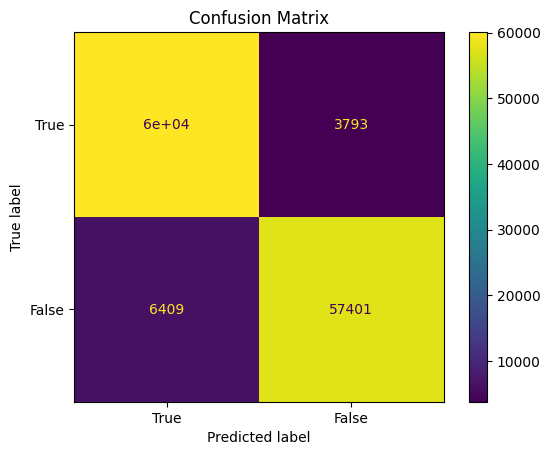

In [145]:

#confusion matrix

cnf_matrix=confusion_matrix(y_test,predict2)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=[True, False]).plot()
plt.title('Confusion Matrix')
plt.show()

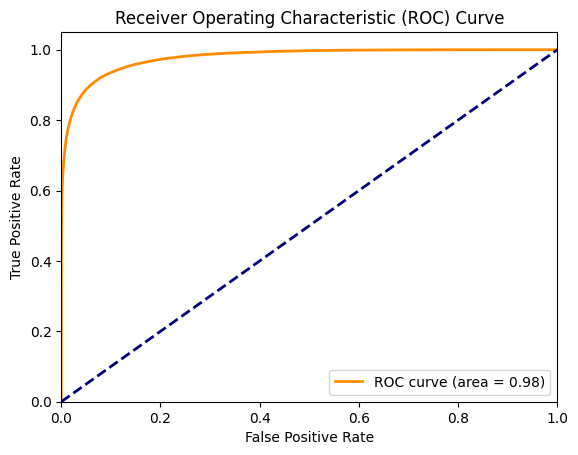

In [146]:
#AUC/ROC curve
y_pred_proba = rf2.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [147]:
joblib.dump(dtc, 'model.pkl') 

['model.pkl']

In [148]:
joblib.dump(rf2,'rmodel.pkl')

['rmodel.pkl']

In [73]:
pred=dtc.predict(Final_data_test)
c=0
for i in pred:
    if i==1:
        c+=1
print("Fraud: ",c)
print("Genuiene: ",len(pred)-c)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
pred1=rf2.predict(Final_data_test)
c=0
for i in pred1:
    if i==1:
        c+=1
print("Fraud: ",c)
print("Genuiene: ",len(pred1)-c)